## Analysis on acute lower respiratory infections

Team: Runtime Terrors

Members:    
> Vinu Prasad Bhambore (vpb2)

> Srijith Srinath (ssrina2)

> Dhruman Jayesh Shah (djshah5)

##### Notebook Update 2 - 02/21/2020

Name of the dataset: PAHO Regional Mortality Dataset
    
Background: The PAHO Regional Mortality Database is an integrated database consisting of national datasets from Member States and is updated annually. The dataset includes data from 48 countries and territories.  The source of the national datasets varies by country. For some countries the national institution mandated to collect, integrate, and disseminate mortality data and information is the Ministry of Health, and for others it is the National Institute of Statistics. 

Source: WHO

File Size: 221MB

#### Importing the necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

#### Loading the Mortality data:

In [2]:
# read the dataset from git
url = 'https://media.githubusercontent.com/media/srijith-srinath/PracticalHealthData/master/Data/MortalityData.csv?token=AE65ZK7J6K7MDLWM3SXOTQK6KBXKO'
df = pd.read_csv(url)

In [3]:
df.head()

,CountryName,MortalityYear,Gender,AgeGroupCode,ICD10,Deaths
0,Brazil,2017,Male,21,I479,1
1,Brazil,2017,Male,21,C925,1
2,Brazil,2017,Male,21,I451,1
3,Brazil,2017,Male,21,D292,1
4,Brazil,2017,Male,21,L519,1


The following are the codes that are of our interest. The 2 main lower respiratory infections that we will concentrate on are as follows -

1. Bronchitis
2. Tuberculosis

The codes for each of them are as follows -

**Bronchitis**<br>
J20  Acute bronchitis<br>
J40  Bronchitis, not specified as acute or chronic<br>
J41  Simple and mucopurulent chronic bronchitis<br>
J42  Unspecified chronic bronchitis<br>

**Tuberculosis**<br>
A15  Respiratory tuberculosis<br>
A17  Tuberculosis of nervous system<br>
A18  Tuberculosis of other organs<br>
A19  Miliary tuberculosis<br>

In [4]:
df.dtypes

CountryName      object
MortalityYear     int64
Gender           object
AgeGroupCode      int64
ICD10            object
Deaths            int64
dtype: object

In [5]:
br_df = df[df['ICD10'].str.match(r'(^J20[0-9]*)|(^J40[0-9]*)|(^J41[0-9]*)|(^J42[0-9]*)')]
br_df.reset_index(inplace=True, drop=True)
br_df.head()

,CountryName,MortalityYear,Gender,AgeGroupCode,ICD10,Deaths
0,Brazil,2017,Male,21,J410,1
1,Brazil,2017,Male,17,J40,1
2,Brazil,2017,Male,16,J42,1
3,Brazil,2017,Male,22,J418,1
4,Brazil,2017,Male,20,J411,1


Now that we have a dataset with only the Bronchitis information. We will break the dataset into the four different sets of Bronchitis and then analyze this data.

**Bronchitis Definition**

Bronchitis is an inflammation of the bronchial tubes, the airways that carry air to your lungs. It causes a cough that often brings up mucus, as well as shortness of breath, wheezing, and chest tightness. There are two main types of bronchitis: acute and chronic. The same viruses that cause colds and the flu often cause acute bronchitis.

**J20  Acute Bronchitis**

In [6]:
br_df_j20 = br_df[br_df['ICD10'].str.match(r'(^J20[0-9]*)')]
br_df_j20.head()

,CountryName,MortalityYear,Gender,AgeGroupCode,ICD10,Deaths
10,Brazil,2017,Male,5,J205,1
11,Brazil,2017,Male,5,J206,1
15,Brazil,2017,Male,6,J209,1
16,Brazil,2017,Male,8,J209,1
17,Brazil,2017,Male,4,J208,1


In [7]:
br_df_j20['ICD10'].unique()

array(['J205', 'J206', 'J209', 'J208', 'J201', 'J200', 'J202', 'J204',
       'J203', 'J207'], dtype=object)

As you can see there are 10 different types of Acute Bronchitis, let's take a look at the distribution and then decide how to proceed about it. <br>
The following at the 10 different types of Acute Bronchitis -

J20.0 Acute bronchitis due to Mycoplasma pneumoniae<br>
J20.1 Acute bronchitis due to Hemophilus influenzae<br>
J20.2 Acute bronchitis due to streptococcus<br>
J20.3 Acute bronchitis due to coxsackievirus<br>
J20.4 Acute bronchitis due to parainfluenza virus<br>
J20.5 Acute bronchitis due to respiratory syncytial virus<br>
J20.6 Acute bronchitis due to rhinovirus<br>
J20.7 Acute bronchitis due to echovirus<br>
J20.8 Acute bronchitis due to other specified organisms<br>
J20.9 Acute bronchitis, unspecified<br>

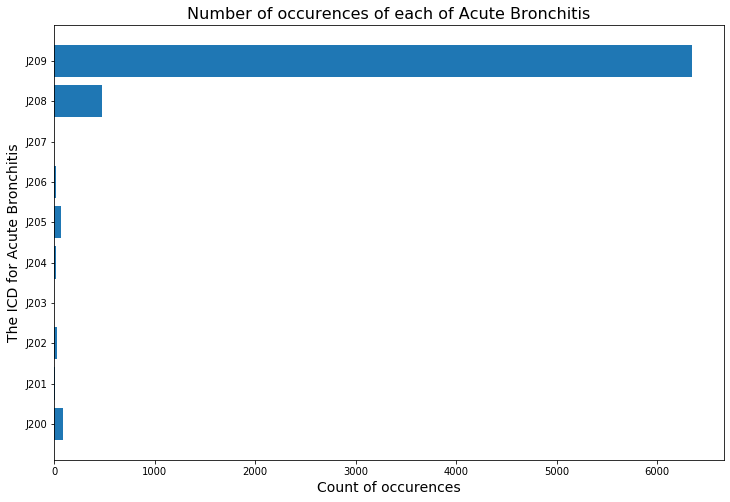

In [8]:
br_df_j20_groups = br_df_j20.groupby('ICD10')['ICD10'].count()
plt.rcParams["figure.figsize"] = (12,8)
plt.barh(br_df_j20_groups.index.values, br_df_j20_groups)
plt.ylabel("The ICD for Acute Bronchitis", fontsize = 14)
plt.xlabel("Count of occurences", fontsize = 14)
plt.title("Number of occurences of each of Acute Bronchitis", fontsize = 16)
plt.show()

From the above distribution we can see that there is value for us to combine the data as supposed to looking at each of these codes seperately.
Before we proceed with any analysis, let us try to see how the results would look if we were to drop the ICD column and then combine all the ages to one entry for the country given a particular year and gender. We will compare this example by looking at just one ICD code.

In [9]:
test_br_df_j20 = br_df_j20.drop(['ICD10','AgeGroupCode'], axis=1)
series_test_data = test_br_df_j20.groupby(['CountryName', 'MortalityYear', 'Gender'])['Deaths'].sum()

In [10]:
argentina_data = pd.DataFrame(series_test_data['Argentina'])
argentina_data.reset_index(inplace=True)
argentina_data.columns

Index(['MortalityYear', 'Gender', 'Deaths'], dtype='object')

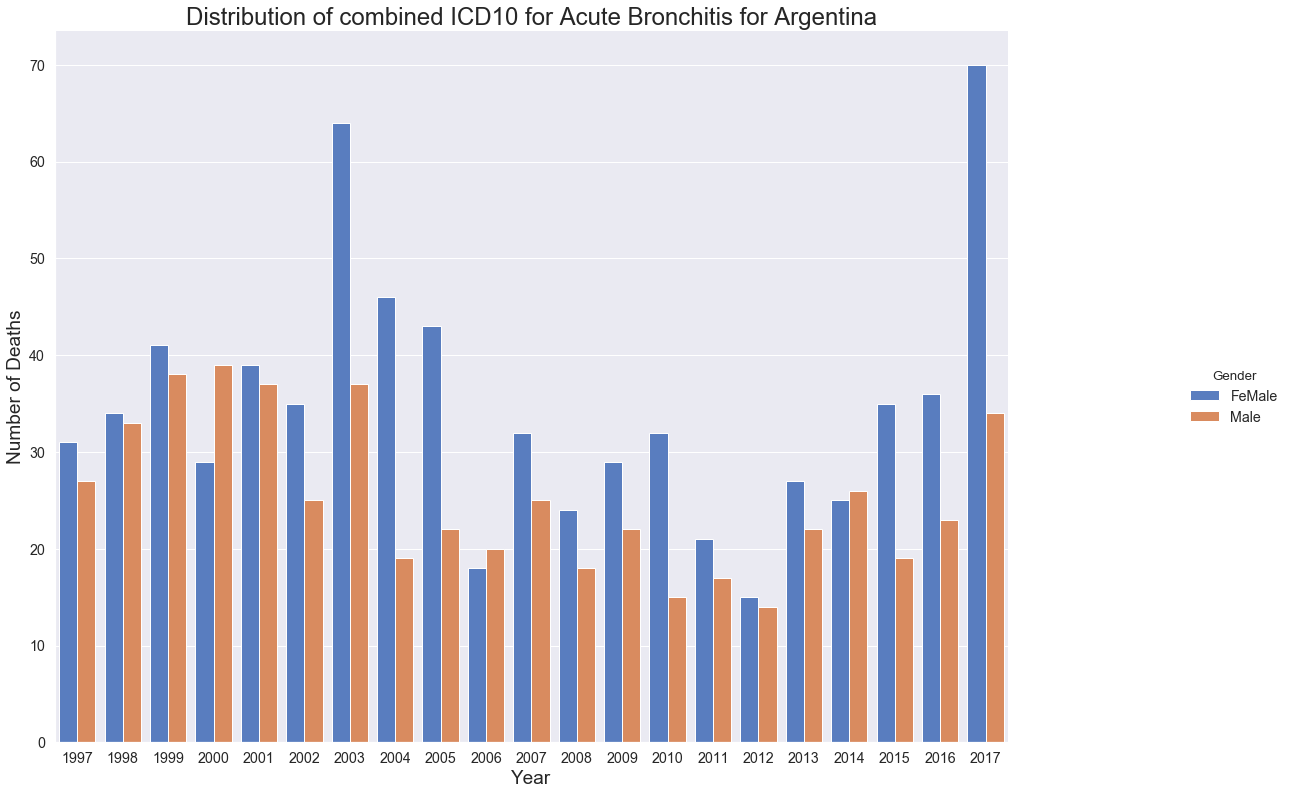

In [11]:
sns.set(font_scale = 1.3)
ex_pt = sns.catplot(x="MortalityYear", y="Deaths", hue="Gender", data=argentina_data,
                height=6, kind="bar", palette="muted")
ex_pt.fig.set_figwidth(20)
ex_pt.fig.set_figheight(12)
plt.ylabel("Number of Deaths", fontsize = 19)
plt.xlabel("Year", fontsize = 19)
plt.title("Distribution of combined ICD10 for Acute Bronchitis for Argentina", fontsize = 24)
plt.show(ex_pt)

In [12]:
smallertest_br_df_j20 = br_df_j20.drop(['AgeGroupCode'], axis=1)
smallertest_br_df_j20 = smallertest_br_df_j20[smallertest_br_df_j20['ICD10']=='J208']
smallerseries_test_data = smallertest_br_df_j20.groupby(['CountryName', 'MortalityYear', 'Gender'])['Deaths'].sum()

In [13]:
smaller_argentina_data = pd.DataFrame(smallerseries_test_data ['Argentina'])
smaller_argentina_data.reset_index(inplace=True)
smaller_argentina_data.columns

Index(['MortalityYear', 'Gender', 'Deaths'], dtype='object')

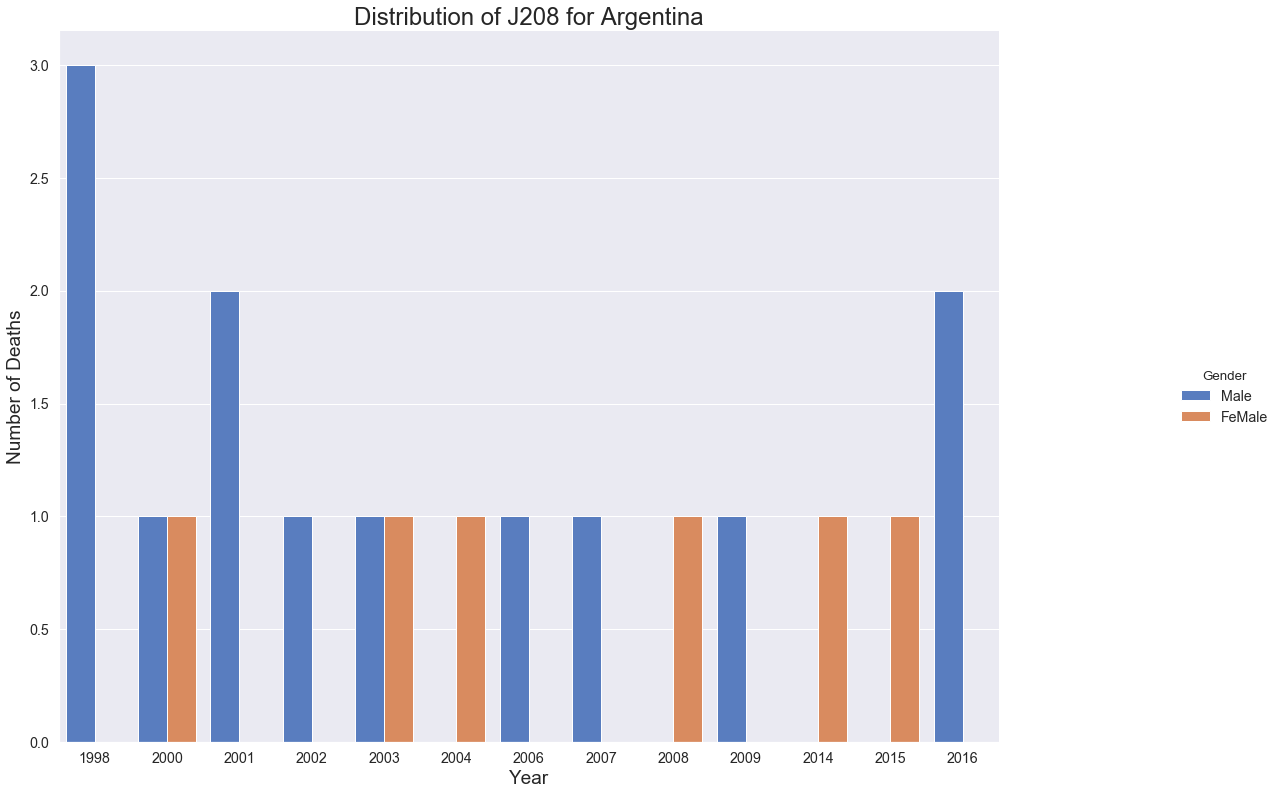

In [14]:
sns.set(font_scale = 1.3)
ex_pt = sns.catplot(x="MortalityYear", y="Deaths", hue="Gender", data=smaller_argentina_data,
                height=6, kind="bar", palette="muted")
ex_pt.fig.set_figwidth(20)
ex_pt.fig.set_figheight(12)
plt.ylabel("Number of Deaths", fontsize = 19)
plt.xlabel("Year", fontsize = 19)
plt.title("Distribution of J208 for Argentina", fontsize = 24)
plt.show(ex_pt)

As you can see that from the above two graphs, you see that if we were to talk a look at the smaller set of the dataset, then we might lose out on some of the datapoints. It makes sense from the above to look at all the sub codes in Acute Bronchitis and view it as a large chunk. The only level of abstraction we will lose is that we will not be able to point out the exact Acute Bronchitis.

**J40  Bronchitis, not specified as acute or chronic**

In [15]:
br_df_j40 = br_df[br_df['ICD10'].str.match(r'(^J40[0-9]*)')]
br_df_j40.head()

,CountryName,MortalityYear,Gender,AgeGroupCode,ICD10,Deaths
1,Brazil,2017,Male,17,J40,1
8,Brazil,2017,Male,12,J40,1
28,Mexico,2017,Male,13,J40,1
32,Mexico,2017,Male,18,J40,1
33,Mexico,2017,Male,17,J40,1


In [16]:
br_df_j40['ICD10'].unique()

array(['J40 '], dtype=object)

As you can see with J40 Bronchitis, not specified as acute or chronic there are no sub codes. We will keep the J40 as is. The question of doing the above exercise doesn't make sense.

**J41  Simple and mucopurulent chronic bronchitis**

In [17]:
br_df_j41 = br_df[br_df['ICD10'].str.match(r'(^J41[0-9]*)')]
br_df_j41.head()

,CountryName,MortalityYear,Gender,AgeGroupCode,ICD10,Deaths
0,Brazil,2017,Male,21,J410,1
3,Brazil,2017,Male,22,J418,1
4,Brazil,2017,Male,20,J411,1
6,Brazil,2017,Male,23,J411,1
9,Brazil,2017,Male,26,J410,1


In [18]:
br_df_j41['ICD10'].unique()

array(['J410', 'J418', 'J411'], dtype=object)

As you can see there are 3 different types of Simple and mucopurulent chronic bronchitis, let's take a look at the distribution and then decide how to proceed about it.
The following at the 3 different types of Simple and mucopurulent chronic bronchitis -

J41.0 Simple chronic bronchitis<br>
J41.1 Mucopurulent chronic bronchitis<br>
J41.8 Mixed simple and mucopurulent chronic bronchitis<br>

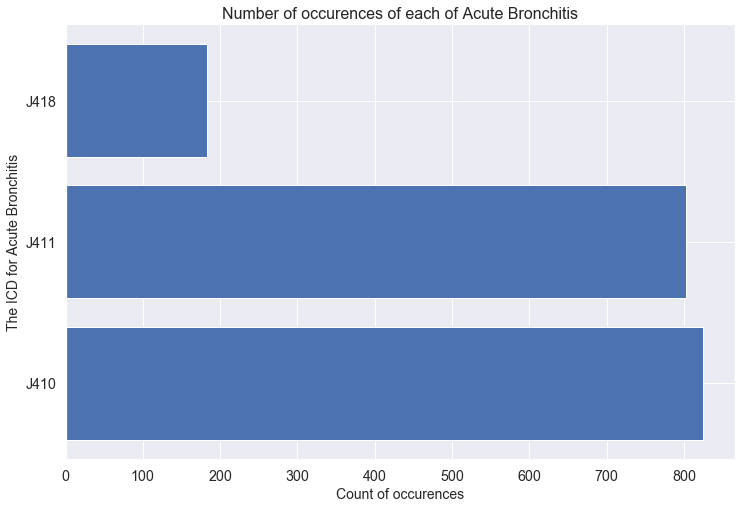

In [19]:
br_df_j41_groups = br_df_j41.groupby('ICD10')['ICD10'].count()
plt.rcParams["figure.figsize"] = (12,8)
plt.barh(br_df_j41_groups.index.values, br_df_j41_groups)
plt.ylabel("The ICD for Acute Bronchitis", fontsize = 14)
plt.xlabel("Count of occurences", fontsize = 14)
plt.title("Number of occurences of each of Acute Bronchitis", fontsize = 16)
plt.show()

Even the distribution has enough instances in the 3 different categories. One of the sub code is a mix of the other two subcodes. From a purely analytical point of view, it doesnt make sense to look at them at 3 different sub categories. Just like how we combined for Acute Bronchitis.

**J42  Unspecified chronic bronchitis**

In [20]:
br_df_j42 = br_df[br_df['ICD10'].str.match(r'(^J42[0-9]*)')]
br_df_j42.head()

,CountryName,MortalityYear,Gender,AgeGroupCode,ICD10,Deaths
2,Brazil,2017,Male,16,J42,1
5,Brazil,2017,Male,15,J42,1
7,Brazil,2017,Male,13,J42,1
19,Mexico,2017,Male,7,J42,1
20,Mexico,2017,Male,10,J42,1


In [21]:
br_df_j42['ICD10'].unique()

array(['J42 '], dtype=object)

As you can see with J42 Unspecified chronic bronchitis has a single code. We will keep the J42 as is. The question of doing the above exercise doesn't make sense.

From the analysis we can conclude that we do not want to split the ICD10 codes to sub codes for the various types of Bronchitis. Instead of going through the entire ordeal of the exercise as above we will consider only the higher level of ICD10 codes for Tuberculosis Data as well.